In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

import dataset, dataset_partition, dataset_resize_and_rescale, dataset_augmentation

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [3]:
PATH = "../dataset/PotatoVillage"
data = dataset.load_data(PATH)

Found 2152 files belonging to 3 classes.


In [4]:
train_ds, val_ds, test_ds = dataset_partition.get_dataset_partitions(data)

In [5]:
# The data set is cached and pre-fetched for improved performance.

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [6]:
resize_and_rescale = dataset_resize_and_rescale.resize_and_rescale()

In [7]:
data_augmentation = dataset_augmentation.data_augmentation()

In [8]:
# Building the model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4563 - loss: 0.9674 - val_accuracy: 0.5156 - val_loss: 0.8539
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5899 - loss: 0.8574 - val_accuracy: 0.7240 - val_loss: 0.6198
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7487 - loss: 0.6085 - val_accuracy: 0.8698 - val_loss: 0.3187
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 929ms/step - accuracy: 0.8744 - loss: 0.3524 - val_accuracy: 0.9115 - val_loss: 0.2729
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 943ms/step - accuracy: 0.8823 - loss: 0.2994 - val_accuracy: 0.9167 - val_loss: 0.2435
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 941ms/step - accuracy: 0.8897 - loss: 0.2743 - val_accuracy: 0.8698 - val_loss: 0.2680
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 944ms/step - accuracy: 0.8952 - loss: 0.2541 - val_accuracy: 0.9219 - val_loss: 0.1890
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 934ms/step - accuracy: 0.9151 - loss: 0.2211 - val_accuracy: 0.9

In [12]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 290ms/step - accuracy: 0.9641 - loss: 0.0643


[0.07349611073732376, 0.96484375]

In [14]:
model.save("../models/Simple_CNN/model.keras")

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

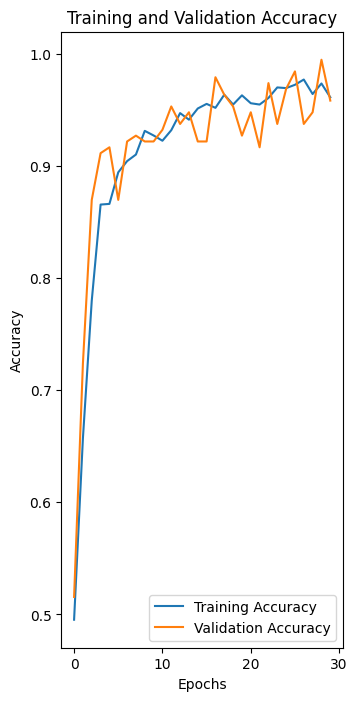

In [19]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.savefig("../models/Simple_CNN/training_and_validation_accuracy.jpg")

plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.savefig("../models/Simple_CNN/training_and_validation_loss.jpg")

plt.show()